In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
k = 100

/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


0.64

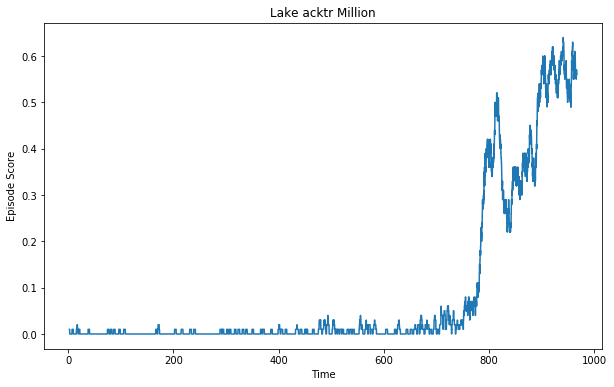

In [6]:
# LAKE acktr Time
# Read in File as pandas dataframe
file_data = pd.read_csv("lake/lake_acktr_million.csv")
lake_acktr_million_df = pd.DataFrame(columns= file_data.iloc[0,:], data=file_data.iloc[1:,].as_matrix())

#PLOTTING  
fig, ax = plt.subplots(1,1, figsize=(10,6))
x_acktr_time = pd.to_numeric(lake_acktr_million_df.t.values)
acktr_my = pd.to_numeric(file_data.iloc[1:].index.values)
ax.set_title("Lake acktr Million")
ax.set_xlabel("Time")
ax.set_ylabel("Episode Score")
#ax.plot(x_acktr_time , acktr_my);

acktr_hy2 = []
for i in range(len(acktr_my) - k):
    num = 0
    for j in range(k):
        num += acktr_my[i+j]
    acktr_hy2.append(num/k)
    
ax.plot(x_acktr_time[:-k], acktr_hy2);
max(acktr_hy2)

/home/mkolor/jupyter_nb_directory/jupyter_nb_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


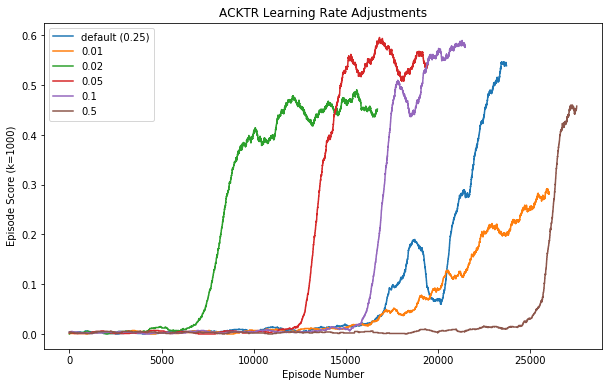

In [13]:
#PLOTTING  
fig, ax = plt.subplots(1,1, figsize=(10,6))
files=["default", "0.01", "0.02", "0.05", "0.1", "0.5"]


for filestring in files:
    
    # LAKE ACKTR MILLION
    # Read in File as pandas dataframe
    if(filestring == "default"):
        file_data = pd.read_csv("acktr_data/acktr_million_{0}.csv".format(filestring),index_col=False)
    else:
        file_data = pd.read_csv("acktr_data/acktr_million_lr_{0}.csv".format(filestring),index_col=False)

    lake_acktr_million_df = pd.DataFrame(columns= file_data.iloc[0,:], data=file_data.iloc[1:,].as_matrix())

    x = pd.to_numeric(lake_acktr_million_df.index.values)
    y = pd.to_numeric(lake_acktr_million_df.r.values)
    
    ax.set_title("ACKTR Learning Rate Adjustments")
    ax.set_xlabel("Episode Number")
    ax.set_ylabel("Episode Score (k={0})".format(k))
    #ax.plot(x, y);

    k = 1000

    acktr_my2 = []
    for i in range(len(y) - k):
        num = 0
        for j in range(k):
            num += y[i+j]
        acktr_my2.append(num/k)

    if(filestring == "default"):
        filestring = "default (0.25)"
    ax.plot(x[:-k], acktr_my2, label=filestring);
    ax.legend()
    #file_data.iloc[0,:].values
    
plt.savefig('CleanedPlots/acktr_adjust.png')